In [1]:
import omega500analysistools.IO.load_db as load_db
from omega500fitstools.IO.read_Omega500 import *
from scipy.stats.stats import pearsonr   

In [2]:
import pandas as pd
import numpy as np
import sqlite3
# import matplotlib as mpl
# params = {
#    'axes.labelsize': 14,
#    'font.size': 12,
#    'legend.fontsize': 12,
#    'xtick.labelsize': 14,
#    'ytick.labelsize': 14,
#    'legend.frameon': False,
#    'text.usetex': False,
#    'figure.figsize': [6.5, 4.5]
#    }
# mpl.rcParams.update(params)
import matplotlib.pyplot as plt
plt.style.use('mypresentation')

from mergertree, get z0_parent_id, child_id, child_aexp, is_main_line 

from halos, according to the selection from mergertree (match aexp,id), get M_total_500c 

add another sheet super mergertree, with columns z0_parent_id, parent_aexp/id, child_aexp/id, parent/child M_total_500c

and plot aexp vs. M_total_500c

In [3]:
# database = '/Users/hqchen/filacf/Omega500/databases/L500_NR_0.db'

In [4]:
# df=load_db.return_table(database)

In [5]:
smt=pd.read_csv('../data/SMT_NR.csv')

In [6]:
groupbyz0id=smt.groupby('z0_parent_id')
znow=1.0005
allz0id=smt[smt['aexp']==znow]['id'].as_matrix()
print allz0id


[   1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   11.   13.
   14.   15.   16.   17.   19.   21.   23.   25.   26.   27.   29.   31.
   32.   33.   34.   35.   39.   42.   44.   45.   49.   50.   53.   54.
   55.   59.   61.   63.   65.   66.   68.   69.   71.   73.   77.   78.
   79.   80.   81.   82.   83.   85.   86.   88.   91.   96.   98.  100.
  104.  106.  108.  125.  131.  132.  135.  140.  146.  149.  153.  156.
  161.  175.  200.  201.  217.  223.  229.  248.  284.  298.  434.  471.
  732.]


[ 1.08126327  1.04495183  1.07861459  1.34858085  1.1864241   1.06360718
  1.05935325  1.04714959  1.01512869  1.02829117  0.98957801  0.98921869
  1.02390644  1.02965936  1.06201667  1.04724845  1.28323025  1.63335265
  1.59119356  1.77019778  1.11860162  1.13365473  1.3046884   1.08845395
  1.00740459  0.98833271         nan         nan         nan]
190    6.977500e+14
191    6.453100e+14
192    6.175500e+14
193    5.725400e+14
194    4.245500e+14
195    3.578400e+14
196    3.364400e+14
197    3.175900e+14
198    3.032900e+14
199    2.987700e+14
200    2.905500e+14
201    2.936100e+14
202    2.968100e+14
203    2.898800e+14
204    2.815300e+14
205    2.650900e+14
206    2.531300e+14
207    1.972600e+14
208    1.207700e+14
209    7.589900e+13
210    4.287600e+13
211    3.833000e+13
212    3.381100e+13
213    2.591500e+13
214    2.380900e+13
215    2.363400e+13
216    2.391300e+13
217             NaN
218             NaN
Name: M_total_200m, dtype: float64


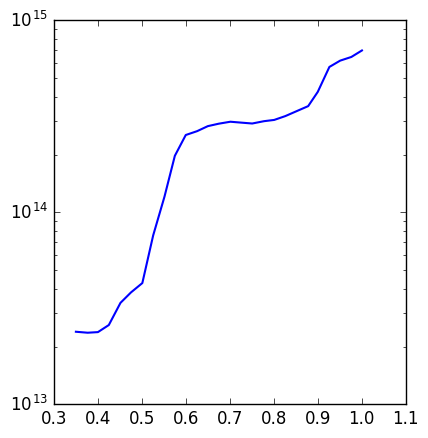

In [7]:
fig=plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.55, 0.8])
for i,CLid in enumerate(allz0id[6:7]):
    tmpdata=groupbyz0id.get_group(CLid)
    M0= tmpdata['M_total_200m'].iloc[0]
    print tmpdata['M_total_200m'][:-1].as_matrix()/tmpdata['M_total_200m'][1:].as_matrix()
    print tmpdata['M_total_200m'][:-1]
    ax.plot(tmpdata['aexp'],(tmpdata['M_total_200m']))#,label='ell='+str(ell),alpha=0.7)
    plt.yscale('log')
plt.show()

### cut according to M200m

In [8]:
merger={}
merger['z0_parent_id']=allz0id

mrthresh=[1.1,1.167,1.2,1.33,1.5] ;
mrstr=['1:10','1:6','1:5','1:3','1:2']
athresh=[0.5,0.6,0.7,0.8,0.9]

for j,mrth in enumerate(mrthresh):
    for ath in athresh:
        tmp=[]
        for i,CLid in enumerate(allz0id):
            tmpdata=groupbyz0id.get_group(CLid)[:21]
            aafter= tmpdata['aexp'].iloc[:-1].as_matrix()[::-1]
            after= tmpdata['M_total_200m'].iloc[:-1].as_matrix()[::-1]
            before= tmpdata['M_total_200m'].iloc[1:].as_matrix()[::-1]
            massratio=after/before
            findind=np.where(aafter>(ath+0.01))[0]
            tmp.append(((massratio[findind])>mrth).any())
            merger[mrstr[j]+' after a='+str(ath)]=tmp


merger=pd.DataFrame(merger)
merger.to_csv('../data/mergers.csv',index=False)
merger=pd.read_csv('../data/mergers.csv')
merger

### cut according to M500c M200c

In [13]:
merger={}
merger['z0_parent_id']=allz0id

mrthresh=[1.1,1.167,1.2,1.33,1.5] ;
mrstr=['1:10','1:6','1:5','1:3','1:2']
athresh=[0.5,0.6,0.7,0.8,0.9]

for j,mrth in enumerate(mrthresh):
    for ath in athresh:
        tmp=[]
        for i,CLid in enumerate(allz0id):
            tmpdata=groupbyz0id.get_group(CLid)[:21]
            aafter= tmpdata['aexp'].iloc[:-1].as_matrix()[::-1]
            after= tmpdata['M_total_200c'].iloc[:-1].as_matrix()[::-1]
            before= tmpdata['M_total_200c'].iloc[1:].as_matrix()[::-1]
            massratio=after/before
            findind=np.where(aafter>(ath+0.01))[0]
            tmp.append(((massratio[findind])>mrth).any())
            merger[mrstr[j]+' after a='+str(ath)]=tmp


merger=pd.DataFrame(merger)
merger.to_csv('../data/mergers_200c.csv',index=False)
merger=pd.read_csv('../data/mergers_200c.csv')
merger

,1:10 after a=0.5,1:10 after a=0.6,1:10 after a=0.7,1:10 after a=0.8,1:10 after a=0.9,1:2 after a=0.5,1:2 after a=0.6,1:2 after a=0.7,1:2 after a=0.8,1:2 after a=0.9,...,1:5 after a=0.6,1:5 after a=0.7,1:5 after a=0.8,1:5 after a=0.9,1:6 after a=0.5,1:6 after a=0.6,1:6 after a=0.7,1:6 after a=0.8,1:6 after a=0.9,z0_parent_id
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1.0
1,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,2.0
2,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,3.0
3,True,True,True,False,False,True,True,True,False,False,...,True,True,False,False,True,True,True,False,False,4.0
4,True,True,True,True,False,False,False,False,False,False,...,True,True,True,False,True,True,True,True,False,5.0
5,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,6.0
6,True,True,True,True,True,True,False,False,False,False,...,True,True,True,True,True,True,True,True,True,7.0
7,True,True,True,True,True,False,False,False,False,False,...,True,True,True,False,True,True,True,True,False,8.0
8,True,True,True,False,False,True,False,False,False,False,...,True,True,False,False,True,True,True,False,False,9.0
9,True,True,True,True,False,True,True,True,True,False,...,True,True,True,False,True,True,True,True,False,10.0


In [8]:
fig=plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.9, 0.9])

merger={}
merger['z0_parent_id']=allz0id

mr10_a5=[]
mr5_a5=[]
mr2_a5=[]

mr10_a6=[]
mr5_a6=[]
mr2_a6=[]

mr10_a7=[]
mr5_a7=[]
mr2_a7=[]

mr10_a8=[]
mr5_a8=[]
mr2_a8=[]

mr10_a9=[]
mr5_a9=[]
mr2_a9=[]
for i,CLid in enumerate(allz0id):
    tmpdata=groupbyz0id.get_group(CLid)[:21]
    aafter= tmpdata['aexp'].iloc[:-1].as_matrix()[::-1]
    after= tmpdata['M_total_200m'].iloc[:-1].as_matrix()[::-1]
    before= tmpdata['M_total_200m'].iloc[1:].as_matrix()[::-1]
    massratio=after/before
    
    findind=np.where(aafter>0.51)[0]
    mr10_a5.append(((massratio[findind])>1.1).any())
    mr5_a5.append(((massratio[findind])>1.2).any())
    mr2_a5.append(((massratio[findind])>1.5).any())

    findind=np.where(aafter>0.61)[0]
    mr10_a6.append(((massratio[findind])>1.1).any())
    mr5_a6.append(((massratio[findind])>1.2).any())
    mr2_a6.append(((massratio[findind])>1.5).any())
    
    findind=np.where(aafter>0.71)[0]
    mr10_a7.append(((massratio[findind])>1.1).any())
    mr5_a7.append(((massratio[findind])>1.2).any())
    mr2_a7.append(((massratio[findind])>1.5).any())
    
    findind=np.where(aafter>0.81)[0]
    mr10_a8.append(((massratio[findind])>1.1).any())
    mr5_a8.append(((massratio[findind])>1.2).any())
    mr2_a8.append(((massratio[findind])>1.5).any())

    findind=np.where(aafter>0.91)[0]
    mr10_a9.append(((massratio[findind])>1.1).any())
    mr5_a9.append(((massratio[findind])>1.2).any())
    mr2_a9.append(((massratio[findind])>1.5).any())
    
    
merger['1:10 after a=0.5']=mr10_a5
merger['1:5 after a=0.5']=mr5_a5
merger['1:2 after a=0.5']=mr2_a5

merger['1:10 after a=0.6']=mr10_a6
merger['1:5 after a=0.6']=mr5_a6
merger['1:2 after a=0.6']=mr2_a6

merger['1:10 after a=0.7']=mr10_a7
merger['1:5 after a=0.7']=mr5_a7
merger['1:2 after a=0.7']=mr2_a7

merger['1:10 after a=0.8']=mr10_a8
merger['1:5 after a=0.8']=mr5_a8
merger['1:2 after a=0.8']=mr2_a8

merger['1:10 after a=0.9']=mr10_a9
merger['1:5 after a=0.9']=mr5_a9
merger['1:2 after a=0.9']=mr2_a9

merger=pd.DataFrame(merger)
merger.to_csv('../data/recent_mergers.csv',index=False)

plt.grid(which='both')

major_ticks = np.arange(1, 2.6, 0.2)                                              
minor_ticks = np.arange(1, 2.6, 0.05)                                               
                  
ax.set_yticks(major_ticks)                                                       
ax.set_yticks(minor_ticks, minor=True)   
plt.grid(which='both')
ax.grid(which='minor', alpha=0.2)                                                
ax.grid(which='major', alpha=0.5)   
plt.ylim([1,2])   
plt.show()

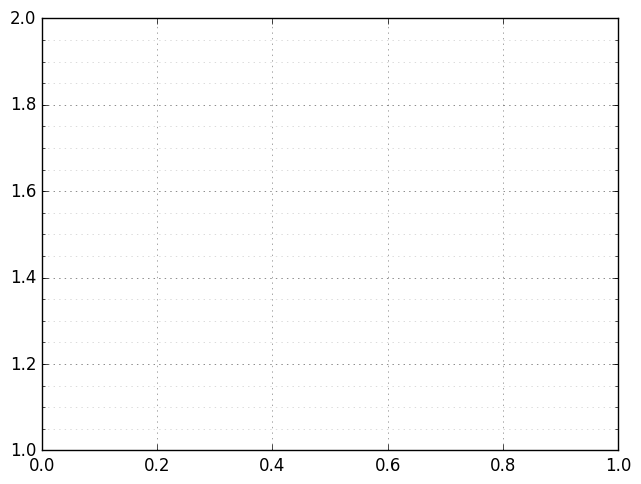

In [10]:
fig=plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.9, 0.9])

merger={}
merger['z0_parent_id']=allz0id

mr10_a5=[]
mr5_a5=[]
mr2_a5=[]

mr10_a6=[]
mr5_a6=[]
mr2_a6=[]

mr10_a7=[]
mr5_a7=[]
mr2_a7=[]

mr10_a8=[]
mr5_a8=[]
mr2_a8=[]

mr10_a9=[]
mr5_a9=[]
mr2_a9=[]
for i,CLid in enumerate(allz0id):
    tmpdata=groupbyz0id.get_group(CLid)[:21]
    aafter= tmpdata['aexp'].iloc[:-1].as_matrix()[::-1]
    after= tmpdata['M_total_200m'].iloc[:-1].as_matrix()[::-1]
    before= tmpdata['M_total_200m'].iloc[1:].as_matrix()[::-1]
    massratio=after/before
    
    findind=np.where(aafter>0.51)[0]
    mr10_a5.append(((massratio[findind])>1.1).any())
    mr5_a5.append(((massratio[findind])>1.2).any())
    mr2_a5.append(((massratio[findind])>1.5).any())

    findind=np.where(aafter>0.61)[0]
    mr10_a6.append(((massratio[findind])>1.1).any())
    mr5_a6.append(((massratio[findind])>1.2).any())
    mr2_a6.append(((massratio[findind])>1.5).any())
    
    findind=np.where(aafter>0.71)[0]
    mr10_a7.append(((massratio[findind])>1.1).any())
    mr5_a7.append(((massratio[findind])>1.2).any())
    mr2_a7.append(((massratio[findind])>1.5).any())
    
    findind=np.where(aafter>0.81)[0]
    mr10_a8.append(((massratio[findind])>1.1).any())
    mr5_a8.append(((massratio[findind])>1.2).any())
    mr2_a8.append(((massratio[findind])>1.5).any())

    findind=np.where(aafter>0.91)[0]
    mr10_a9.append(((massratio[findind])>1.1).any())
    mr5_a9.append(((massratio[findind])>1.2).any())
    mr2_a9.append(((massratio[findind])>1.5).any())
    
    
merger['1:10 after a=0.5']=mr10_a5
merger['1:5 after a=0.5']=mr5_a5
merger['1:2 after a=0.5']=mr2_a5

merger['1:10 after a=0.6']=mr10_a6
merger['1:5 after a=0.6']=mr5_a6
merger['1:2 after a=0.6']=mr2_a6

merger['1:10 after a=0.7']=mr10_a7
merger['1:5 after a=0.7']=mr5_a7
merger['1:2 after a=0.7']=mr2_a7

merger['1:10 after a=0.8']=mr10_a8
merger['1:5 after a=0.8']=mr5_a8
merger['1:2 after a=0.8']=mr2_a8

merger['1:10 after a=0.9']=mr10_a9
merger['1:5 after a=0.9']=mr5_a9
merger['1:2 after a=0.9']=mr2_a9

merger=pd.DataFrame(merger)
merger.to_csv('../data/recent_mergers.csv',index=False)

plt.grid(which='both')

major_ticks = np.arange(1, 2.6, 0.2)                                              
minor_ticks = np.arange(1, 2.6, 0.05)                                               
                  
ax.set_yticks(major_ticks)                                                       
ax.set_yticks(minor_ticks, minor=True)   
plt.grid(which='both')
ax.grid(which='minor', alpha=0.2)                                                
ax.grid(which='major', alpha=0.5)   
plt.ylim([1,2])   
plt.show()

In [8]:
merger=pd.read_csv('../data/recent_mergers.csv')

In [9]:
Lv8elldata=np.loadtxt('../data/r500c_ell_NR_gas_Lv8.txt')
Lv7elldata=np.loadtxt('../data/r500c_ell_NR_gas_Lv7.txt')
Lv6elldata=np.loadtxt('../data/r500c_ell_NR_gas_Lv6.txt')
Lv5elldata=np.loadtxt('../data/r500c_ell_NR_gas_Lv5.txt')
Lv6dmelldata=np.loadtxt('../data/Lv6_r500c_ell_NR_dm.txt')

Lv7csdata=np.loadtxt('../data/cs_Lv7_r500c_NR_gas.txt')
Lv7csdata_nocut=np.loadtxt('../data/cs_Lv7_r500c_NR_gas_nocut.txt')

In [12]:
CLidlist=Lv6elldata[:,0]
# print CLidlist==ids
# print CLidlist== Lv5elldata[:,0]
allell=np.concatenate([Lv6elldata,Lv5elldata[:,1:]],axis=1)
# print np.shape(allell)


rlist=np.arange(0.1,2.71,0.1)
ir=5

ell_r500c=allell[:,ir]
# cs_r500c=Lv7csdata[:,ir]
# cs_r500c_nocut=Lv7csdata_nocut[:,ir]
print len(ell_r500c)#,len(cs_r500c)

61


In [51]:
Gamma=[]
# for name, group in groupbyz0id:
    
    
ia=12
for CLid in allz0id:
    group=groupbyz0id.get_group(CLid).iloc[0:25]
    
    nom=(np.log10(group['M_total_200m'].iloc[0])-np.log10(group['M_total_200m'].iloc[ia]))
    denom=(np.log10(group['aexp'].iloc[0])-np.log10(group['aexp'].iloc[ia]))
    Gamma.append(nom/denom)
a=group['aexp'].iloc[ia]
print a


0.7015


In [52]:
ell_r500c=Lv8elldata[:,-1]

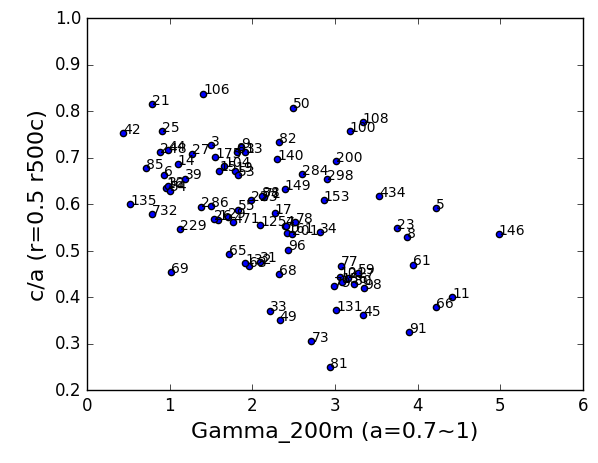

(-0.49260159214332072, 1.6770063260665767e-06)


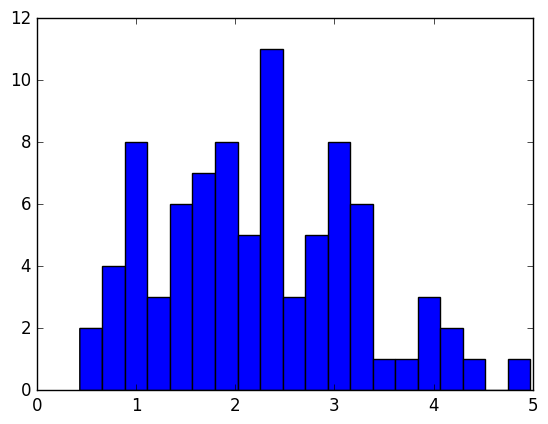

In [53]:
# selectid=list((set(CLidlist))-set([81,23,35,66,156,17,73]))

plt.scatter(Gamma,ell_r500c)
for i, txt in enumerate(allz0id):
    txt=str(int(txt))
    plt.annotate(txt, (Gamma[i],ell_r500c[i]))
plt.ylim([0.2,1])
plt.xlabel('Gamma_200m (a='+str(np.around(a,decimals=2))+'~1)')
plt.ylabel('c/a (r='+str(ir*0.1)+' r500c)')
plt.savefig('Gamma_200m (a='+str(np.around(a,decimals=2))+'~1)'+str(ir*0.1)+' r500c).png')
plt.show()
print pearsonr(Gamma,ell_r500c)

plt.hist(Gamma,bins=20)

plt.show()

In [55]:
mask=[]
gammabins=np.arange(0.2,5,1.5)

for i in range(len(gammabins)-1):
    mask.append((Gamma<gammabins[i+1])&(Gamma>gammabins[i]))
print len(mask)
import matplotlib.cm as cm
import matplotlib.colors as colors
cnorm=colors.Normalize(vmin=0,vmax=len(mask))
scalarmap=cm.ScalarMappable(norm=cnorm,cmap=cm.rainbow)
for jm in range(len(mask)):
    med=[];up=[];down=[]
    print 'sample size:',np.sum(mask[jm])
    color=scalarmap.to_rgba(jm+1)
    for i in range(1,28):
        tmpdata=allell[mask[jm]][:,i]
        #ellmed=np.median(tmpdata[~np.isnan(tmpdata)])
        ellmed=np.percentile(tmpdata[~np.isnan(tmpdata)],50)
        ellup=np.percentile(tmpdata[~np.isnan(tmpdata)],88)
        elldown=np.percentile(tmpdata[~np.isnan(tmpdata)],12)
        med.append(ellmed); up.append(ellup); down.append(elldown)
    med=np.array(med); up=np.array(up); down=np.array(down)
    plt.errorbar(rlist,med,yerr=[med-down,up-med],c=color,label=r'$\Gamma_{200m}$ '+str(gammabins[jm])+'-'+str(gammabins[jm+1]))
plt.legend()
plt.xlabel('r/r500c')
plt.ylabel('c/a')
plt.title(r'3D gas ellipticity $\Gamma$ (a='+str(np.around(a,decimals=2))+'~1)')
plt.savefig('3D_gas_ell_vs_r_r500c_errorbar.png')

plt.show()

3
sample size: 27


IndexError: index 5 is out of bounds for axis 1 with size 5

In [17]:
# rlist=np.arange(0.1,2.7,0.1)
# plt.xlabel('r/r500c')
# plt.ylabel('ell c/a')
# # for i in range(len(CLidlist)-30):
# #     plt.plot(rlist[3:],allell[i,1:][3:])
# tmp=[]
# for i in range(len(rlist)):
#     tmp.append(np.median(allell[:,i]))
# plt.plot(rlist,tmp)
# plt.ylim([0,1])
# plt.show()

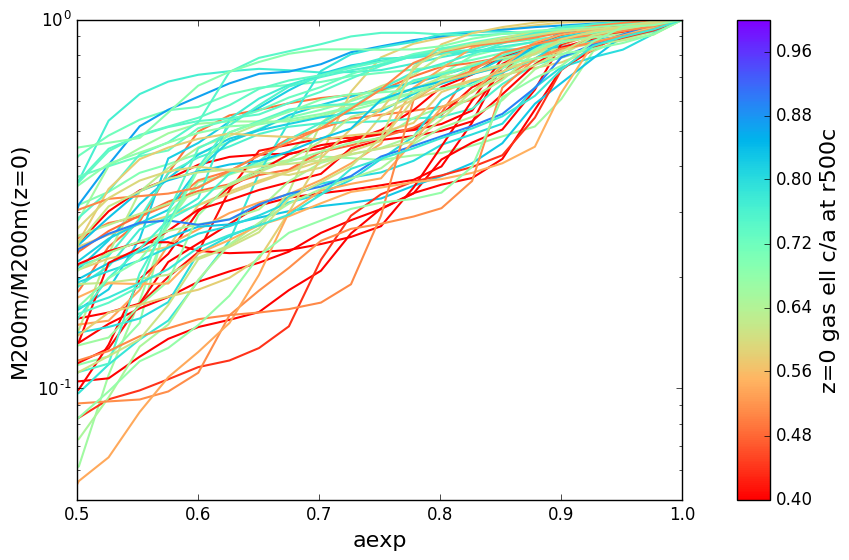

In [18]:
from matplotlib import cm
import matplotlib.colors as colors
import matplotlib
cnorm=colors.Normalize(vmin=0.4,vmax=1.)
cmap=cm.rainbow_r
scalarmap=cm.ScalarMappable(norm=cnorm,cmap=cmap)
fig = plt.figure(figsize=(11, 6))
ax = fig.add_axes([0.1, 0.1, 0.55, 0.8])

for i,CLid in enumerate(CLidlist):
    tmpdata=groupbyz0id.get_group(CLid)
    ell=ell_r500c[i]
    color=scalarmap.to_rgba(ell)
    M0= tmpdata['M_total_200m'].iloc[0]
    ax.plot(tmpdata['aexp'],(tmpdata['M_total_200m'])/M0,c=color)#,label='ell='+str(ell),alpha=0.7)
    plt.yscale('log')
plt.xlim([0.5,1])
plt.xlabel('aexp')
plt.ylabel('M200m/M200m(z=0)')
plt.ylim([5e-2,1e0])
colorbar_ax = fig.add_axes([0.7, 0.1, 0.03, 0.8])
matplotlib.colorbar.ColorbarBase(colorbar_ax ,cmap=cmap, norm=cnorm)
# fig.colorbar(scalarmap.set_array(), cax=colorbar_ax)
plt.ylabel('z=0 gas ell c/a at r500c')
#plt.savefig('MAH_all.png')
plt.show()

In [23]:
selectid=merger['z0_parent_id'][(~merger['1:5 after a=0.7'])&(~merger['1:10 after a=0.8'])]
selectid=list(set(selectid)&(set(CLidlist)))
print selectid,CLidlist

[2.0, 3.0, 132.0, 6.0, 135.0, 14.0, 16.0, 21.0, 25.0, 26.0, 27.0, 29.0, 32.0, 39.0, 42.0, 44.0, 53.0, 65.0, 69.0, 71.0, 83.0, 86.0, 104.0] [   1.    2.    3.    4.    6.    7.    9.   10.   11.   13.   14.   16.
   17.   21.   23.   25.   26.   27.   29.   31.   32.   33.   34.   35.
   39.   42.   44.   49.   50.   53.   55.   59.   61.   65.   66.   68.
   69.   71.   73.   77.   78.   79.   80.   81.   83.   86.   88.   91.
   96.  104.  106.  125.  131.  132.  135.  146.  153.  156.  201.  284.
  434.]


27 0


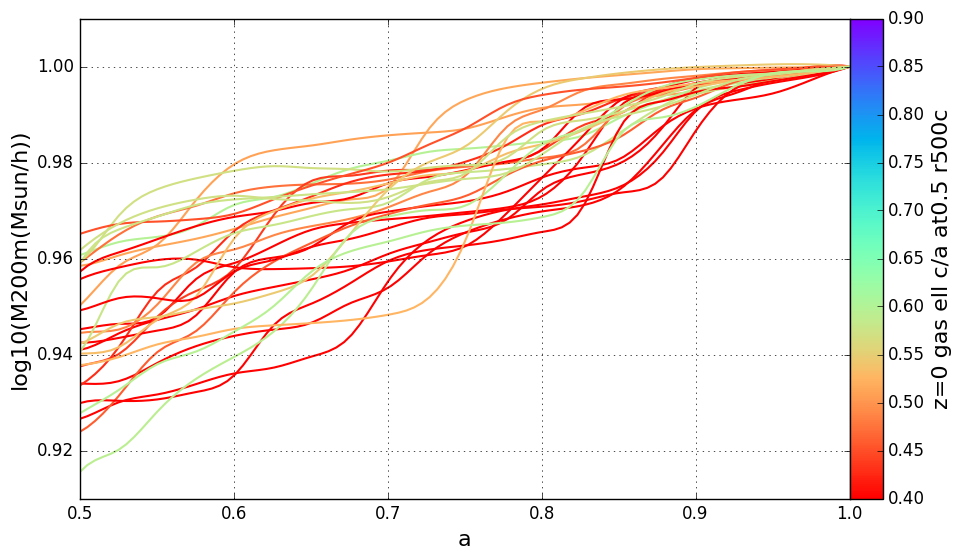

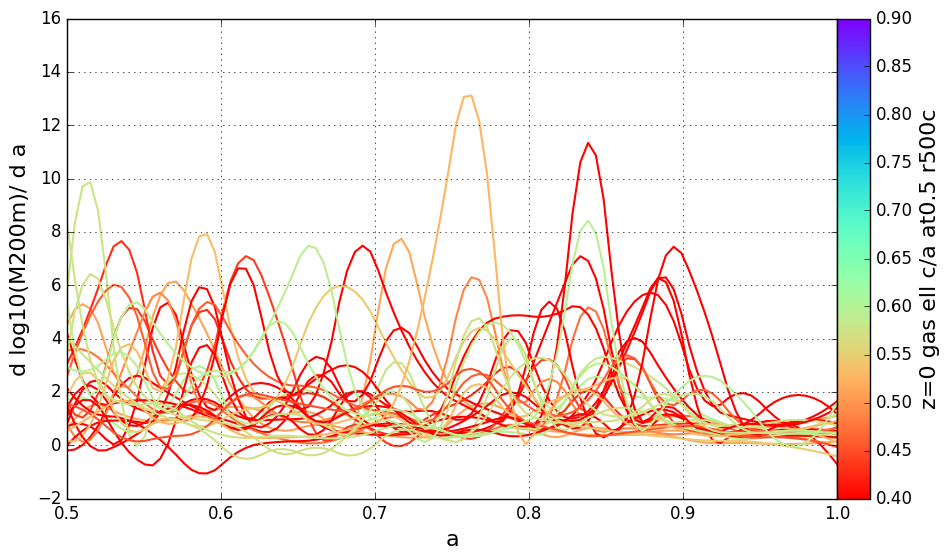

In [60]:
from matplotlib import cm
import matplotlib.colors as colors
import matplotlib
from scipy.interpolate import CubicSpline as spl
from scipy import interpolate
cnorm=colors.Normalize(vmin=0.4,vmax=.9)
cmap=cm.rainbow_r
scalarmap=cm.ScalarMappable(norm=cnorm,cmap=cmap)
fig = plt.figure(figsize=(11, 6))
fig2=plt.figure(figsize=(11, 6))

ax = fig.add_axes([0.1, 0.1, 0.7, 0.8])

ax2=fig2.add_axes([0.1, 0.1, 0.7, 0.8])

aexp_sample=np.linspace(0.5,1,100)

count=0
subcnt=0

similargamma=[]

for CLid in CLidlist:
    
    tmpdata=groupbyz0id.get_group(CLid).iloc[0:25]
    i=np.where(CLidlist==CLid)[0][0]
    ell=ell_r500c[i]
    if ell<0.6:
        count+=1
        color=scalarmap.to_rgba(ell)
        M0= tmpdata['M_total_200m'].iloc[0]
        Mtot=tmpdata['M_total_200m'].as_matrix()
        ae=tmpdata['aexp'].as_matrix()
        spline=spl(ae[::-1],np.log10(Mtot)[::-1])
        deriv=spline.derivative()
        similargamma.append(spline(aexp_sample[-1])-spline(aexp_sample[40]))
        ax.plot(aexp_sample,spline(aexp_sample)/np.log10(M0),c=color)
        ax2.plot(aexp_sample,deriv(aexp_sample),c=color)
#         if (deriv(aexp_sample)[40:]<2).all():
#             subcnt+=1
#             ax.plot(aexp_sample,spline(aexp_sample),c=color)
#             ax2.plot(aexp_sample,deriv(aexp_sample),c=color)
#             print CLid,spline(aexp_sample[-1])-spline(aexp_sample[0])
#             if ell<0.7:
#                 print 'aah',CLid

print count,subcnt
ax.set_xlabel('a')
ax.set_ylabel('log10(M200m(Msun/h))')


colorbar_ax = fig.add_axes([0.8, 0.1, 0.03, 0.8])

colorbar_ax2 = fig2.add_axes([0.8, 0.1, 0.03, 0.8])


ax2.set_ylim([-2,16])
ax2.set_xlabel('a')
ax2.set_ylabel('d log10(M200m)/ d a')


ax.grid(True)
ax.set_xlim([0.5,1])


ax2.grid(True)
ax2.set_xlim([0.5,1])

matplotlib.colorbar.ColorbarBase(colorbar_ax ,cmap=cmap, norm=cnorm)
matplotlib.colorbar.ColorbarBase(colorbar_ax2 ,cmap=cmap, norm=cnorm)

colorbar_ax.set_ylabel('z=0 gas ell c/a at'+str(ir*0.1)+' r500c')
colorbar_ax2.set_ylabel('z=0 gas ell c/a at'+str(ir*0.1)+' r500c')


# fig.savefig('all_MAH.png')
# fig2.savefig('all_MAH_deriv.png')

plt.show()

In [ ]:
# plt.scatter(similargamma,ell_r500c)
# plt.xlabel(r'd log10 M / da')
# plt.ylabel('c/a at r500c')
# plt.show()

10 11 17 23 31 33 34 35 49 61 66 79 80 91 132 0.70202020202
15 0


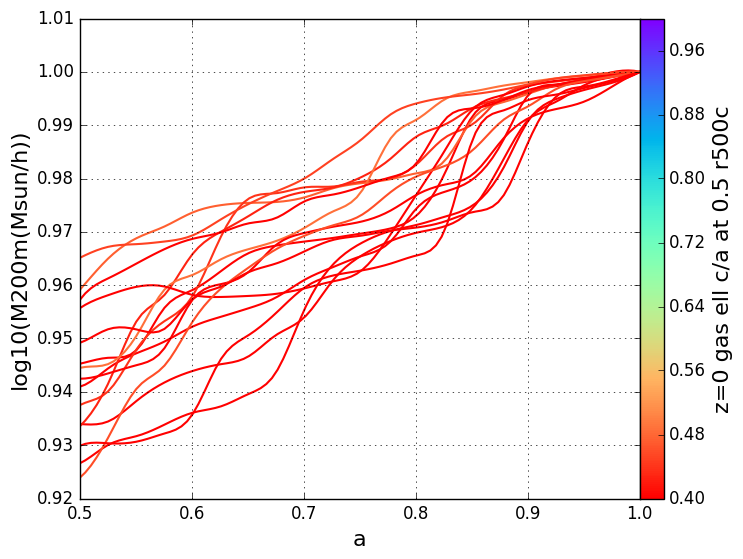

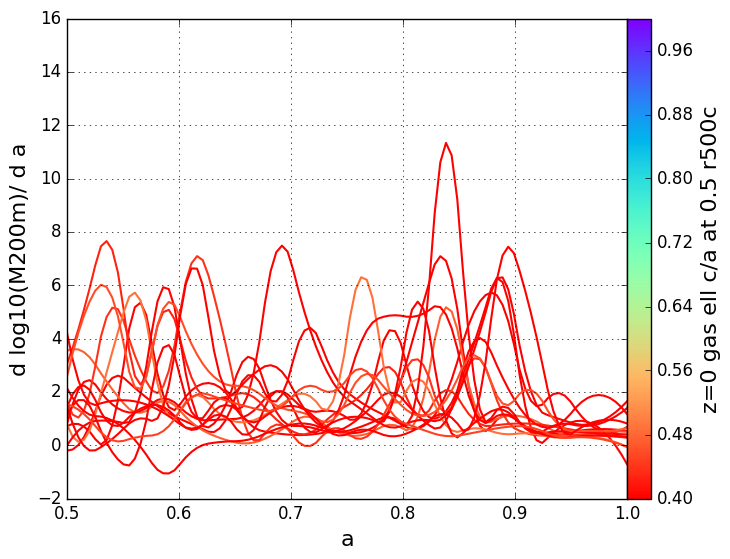

In [76]:
from matplotlib import cm
import matplotlib.colors as colors
import matplotlib
from scipy.interpolate import CubicSpline as spl
from scipy import interpolate
cnorm=colors.Normalize(vmin=0.4,vmax=1.)
cmap=cm.rainbow_r
scalarmap=cm.ScalarMappable(norm=cnorm,cmap=cmap)
fig = plt.figure(figsize=(8, 6))
fig2=plt.figure(figsize=(8, 6))

ax = fig.add_axes([0.1, 0.1, 0.7, 0.8])

ax2=fig2.add_axes([0.1, 0.1, 0.7, 0.8])

aexp_sample=np.linspace(0.5,1,100)

count=0
subcnt=0
for CLid in CLidlist:
    tmpdata=groupbyz0id.get_group(CLid).iloc[0:25]
    i=np.where(CLidlist==CLid)[0][0]
    ell=ell_r500c[i]
    
    if ell<0.5:
        print int(CLid),
        count+=1
        color=scalarmap.to_rgba(ell)
        M0= tmpdata['M_total_200m'].iloc[0]
        Mtot=tmpdata['M_total_200m'].as_matrix()
        ae=tmpdata['aexp'].as_matrix()
        spline=spl(ae[::-1],np.log10(Mtot)[::-1])
        deriv=spline.derivative()
        ax.plot(aexp_sample,spline(aexp_sample)/np.log10(M0),c=color)
        ax2.plot(aexp_sample,deriv(aexp_sample),c=color)
        if (deriv(aexp_sample)[40:]<2).all():
            print 'CLid',CLid
            subcnt+=1
print aexp_sample[40]
print count,subcnt
ax.set_xlabel('a')
ax.set_ylabel('log10(M200m(Msun/h))')

colorbar_ax = fig.add_axes([0.8, 0.1, 0.03, 0.8])

colorbar_ax2 = fig2.add_axes([0.8, 0.1, 0.03, 0.8])
ax2.set_ylim([-2,16])
ax2.set_ylabel('d log10(M200m)/ d a')

ax2.set_xlabel('a')


ax.grid(True)
ax.set_xlim([0.5,1])


ax2.grid(True)
ax2.set_xlim([0.5,1])


matplotlib.colorbar.ColorbarBase(colorbar_ax ,cmap=cmap, norm=cnorm)
matplotlib.colorbar.ColorbarBase(colorbar_ax2 ,cmap=cmap, norm=cnorm)


colorbar_ax.set_ylabel('z=0 gas ell c/a at '+str(ir*0.1)+' r500c')
colorbar_ax2.set_ylabel('z=0 gas ell c/a at '+str(ir*0.1)+' r500c')


fig.savefig('ell<0.5_MAH.png')
fig2.savefig('ell<0.5_MAH_deriv.png')


# fig.colorbar(scalarmap.set_array(), cax=colorbar_ax)
# plt.ylabel('z=0 gas ell c/a at r500c')
plt.show()

3 6 21 25 27 29 42 44 59 78 81 83 104 106 156 0.70202020202
15 6


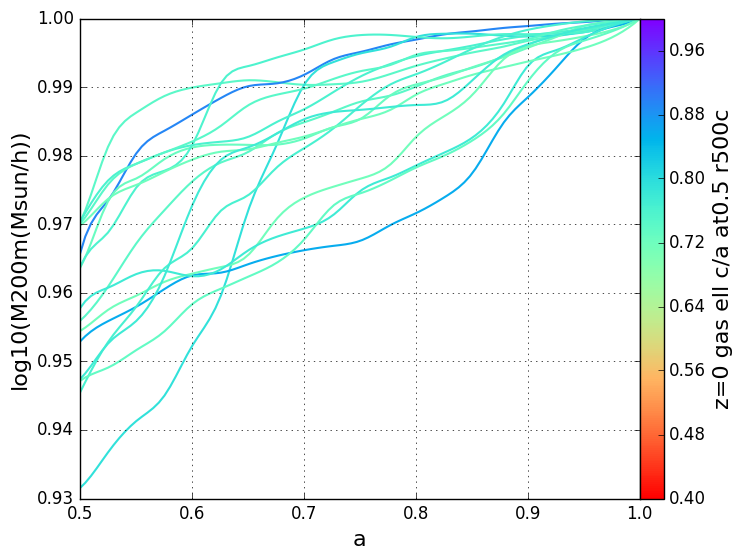

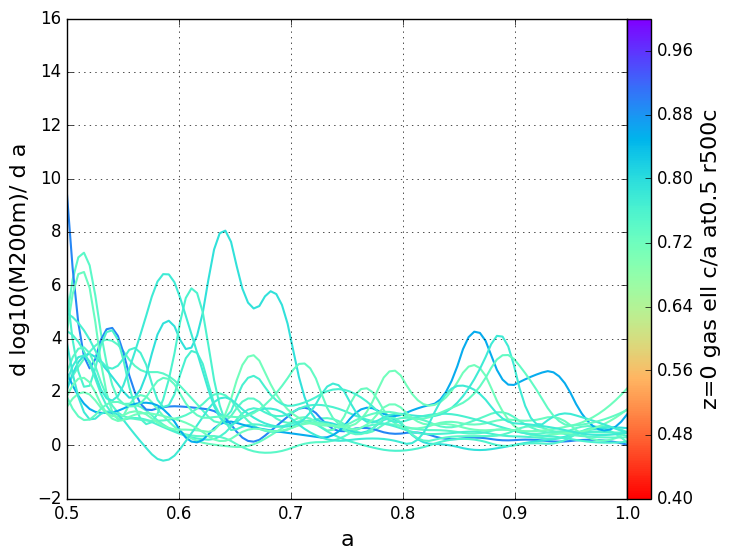

In [83]:
from matplotlib import cm
import matplotlib.colors as colors
import matplotlib
from scipy.interpolate import CubicSpline as spl
from scipy import interpolate
cnorm=colors.Normalize(vmin=0.4,vmax=1.)
cmap=cm.rainbow_r
scalarmap=cm.ScalarMappable(norm=cnorm,cmap=cmap)
fig = plt.figure(figsize=(8, 6))
fig2=plt.figure(figsize=(8, 6))

ax = fig.add_axes([0.1, 0.1, 0.7, 0.8])

ax2=fig2.add_axes([0.1, 0.1, 0.7, 0.8])

aexp_sample=np.linspace(0.5,1,100)

count=0
subcnt=0
for CLid in CLidlist:
    tmpdata=groupbyz0id.get_group(CLid).iloc[0:25]
    i=np.where(CLidlist==CLid)[0][0]
    ell=ell_r500c[i]
    
    if ell>0.7:
        print int(CLid),
        count+=1
        color=scalarmap.to_rgba(ell)
        M0= tmpdata['M_total_200m'].iloc[0]
        Mtot=tmpdata['M_total_200m'].as_matrix()
        ae=tmpdata['aexp'].as_matrix()
        spline=spl(ae[::-1],np.log10(Mtot)[::-1])
        deriv=spline.derivative()
        ax.plot(aexp_sample,spline(aexp_sample)/np.log10(M0),c=color)
        ax2.plot(aexp_sample,deriv(aexp_sample),c=color)
        if (deriv(aexp_sample)[40:]<2).all():
#             print CLid
            subcnt+=1
            
print aexp_sample[40]
print count,subcnt
ax.set_xlabel('a')
ax.set_ylabel('log10(M200m(Msun/h))')

colorbar_ax = fig.add_axes([0.8, 0.1, 0.03, 0.8])

colorbar_ax2 = fig2.add_axes([0.8, 0.1, 0.03, 0.8])
ax2.set_ylim([-2,16])
ax2.set_ylabel('d log10(M200m)/ d a')

ax2.set_xlabel('a')

matplotlib.colorbar.ColorbarBase(colorbar_ax ,cmap=cmap, norm=cnorm)
matplotlib.colorbar.ColorbarBase(colorbar_ax2 ,cmap=cmap, norm=cnorm)

ax.grid(True)
ax.set_xlim([0.5,1])


ax2.grid(True)
ax2.set_xlim([0.5,1])

colorbar_ax.set_ylabel('z=0 gas ell c/a at'+str(ir*0.1)+' r500c')
colorbar_ax2.set_ylabel('z=0 gas ell c/a at'+str(ir*0.1)+' r500c')


fig.savefig('ell>0.7_MAH.png')
fig2.savefig('ell>0.7_MAH_deriv.png')


# fig.colorbar(scalarmap.set_array(), cax=colorbar_ax)
# plt.ylabel('z=0 gas ell c/a at r500c')
plt.show()

In [ ]:
1/0.7

In [ ]:
print df['halos'][df['halos']['aexp']==1.0005][['r200c','id']]

In [ ]:
df['mergers'][df['mergers']['z0_parent_id']==207]

In [ ]:
print df['halos'].columns

In [ ]:
print df['mergers'].columns
df['mergers'][df['mergers']['z0_parent_id']==26]